SIMLR Testing
---

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *

Using TensorFlow backend.
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [31]:
# read in counts fed into SIMLR for comparison
qi = RNA_counts.from_file(datafile='../inputs/qi_s1.500feature.genelabels.tsv', labels=[None, 0])

---
First, read in the `F` construct that consists of a c-dimensional output of length `n_cells`, where c is the number of expected clusters passed to SIMLR.  
  
Here, c was estimated using the `SIMLR_Estimate_Number_of_Clusters` function from the SIMLR package.

In [24]:
latent = pd.read_csv('SIMLR_out/qi_SIMLR_F.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [25]:
qi_SIMLR_results = DR(matrix=latent)
qi_SIMLR_results.results = latent
qi_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
qi_SIMLR_results.name = 'SIMLR'

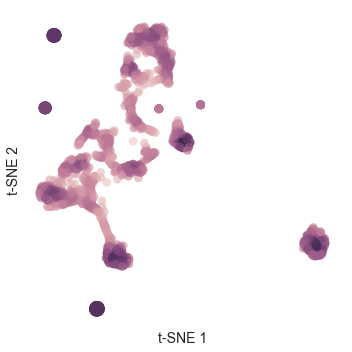

CPU times: user 13.5 s, sys: 571 ms, total: 14 s
Wall time: 14.2 s


In [26]:
%%time
qi_SIMLR_tSNE = fcc_tSNE(matrix=latent, perplexity=100, seed=18)
qi_SIMLR_tSNE.plot()

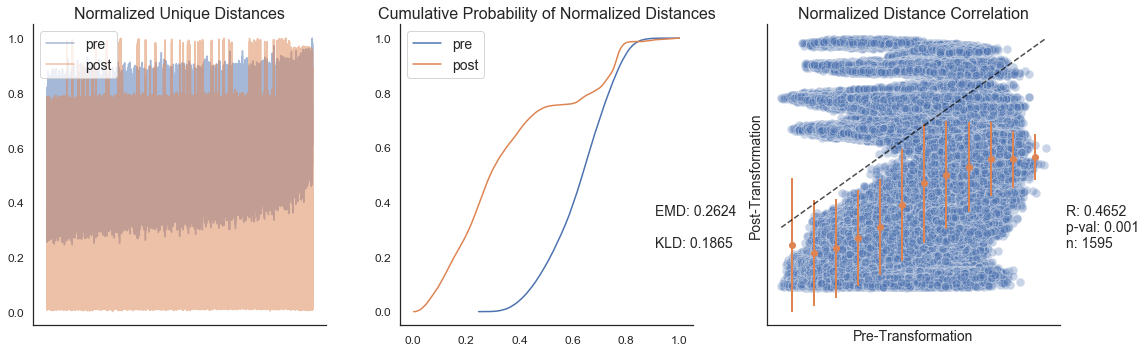

Knn Preservation: 97.2952

CPU times: user 1min 25s, sys: 11.7 s, total: 1min 37s
Wall time: 1min 37s


In [27]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh'), 
                                  post=qi_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), 
                                                       post=qi_SIMLR_results.knn_graph(k))))

---
Now read in the 2D `$ydata` construct and see if that's a lot different from the c-dimensional output (where c is the number of expected clusters passed to SIMLR)

In [28]:
latent = pd.read_csv('SIMLR_out/qi_SIMLR_ydata.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [29]:
qi_SIMLR_results = DR(matrix=latent)
qi_SIMLR_results.results = latent
qi_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
qi_SIMLR_results.name = 'SIMLR'

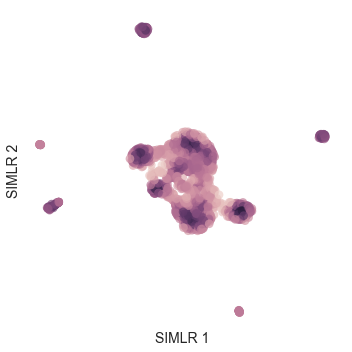

In [30]:
qi_SIMLR_results.plot()

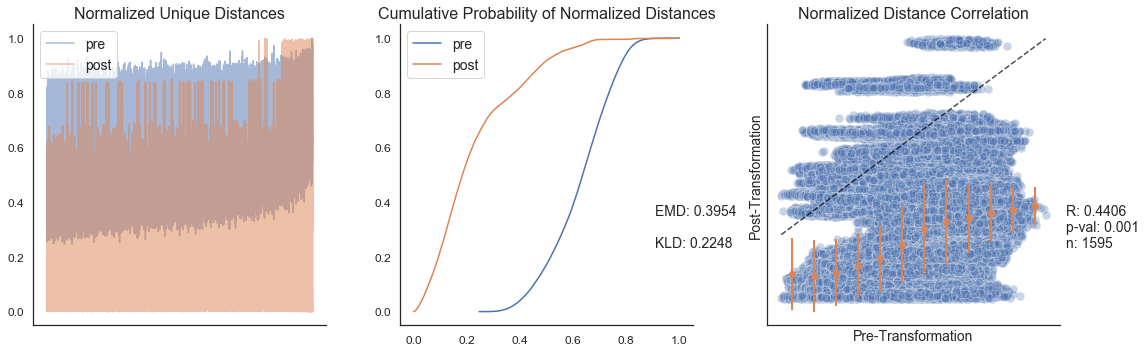

Knn Preservation: 97.2863

CPU times: user 1min 24s, sys: 12.3 s, total: 1min 37s
Wall time: 1min 40s


In [32]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform='arcsinh'), 
                                  post=qi_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), 
                                                       post=qi_SIMLR_results.knn_graph(k))))

---
### Discrete Retina Dataset
Perform same analysis on retina dataset

In [36]:
# read in counts fed into scvis
P14Retina_0 = RNA_counts.from_file(datafile='../inputs/GSM1626793_P14Retina_1.1kcells.tsv')

In [33]:
latent = pd.read_csv('SIMLR_out/retina1_SIMLR_F.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [34]:
retina1_SIMLR_results = DR(matrix=latent)
retina1_SIMLR_results.results = latent
retina1_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina1_SIMLR_results.name = 'SIMLR'

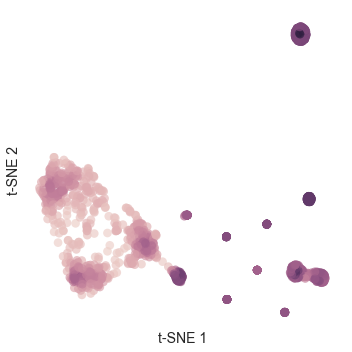

CPU times: user 8.39 s, sys: 490 ms, total: 8.88 s
Wall time: 9.14 s


In [35]:
%%time
retina_SIMLR_tSNE = fcc_tSNE(matrix=latent, perplexity=100, seed=18)
retina_SIMLR_tSNE.plot()

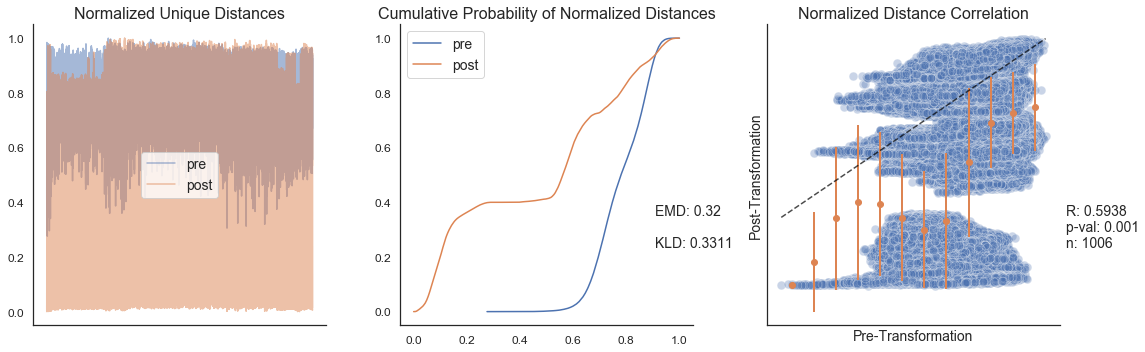

Knn Preservation: 96.1076

CPU times: user 29.1 s, sys: 4.18 s, total: 33.3 s
Wall time: 32.6 s


In [37]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh'), 
                                  post=retina1_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), 
                                                       post=retina1_SIMLR_results.knn_graph(k))))

---
Now read in the 2D `$ydata` construct and see if that's a lot different from the c-dimensional output (where c is the number of expected clusters passed to SIMLR)

In [38]:
latent = pd.read_csv('SIMLR_out/retina1_SIMLR_ydata.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [39]:
retina1_SIMLR_results = DR(matrix=latent)
retina1_SIMLR_results.results = latent
retina1_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina1_SIMLR_results.name = 'SIMLR'

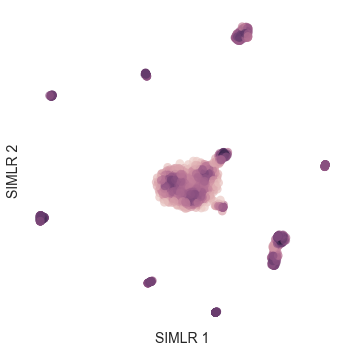

In [40]:
retina1_SIMLR_results.plot()

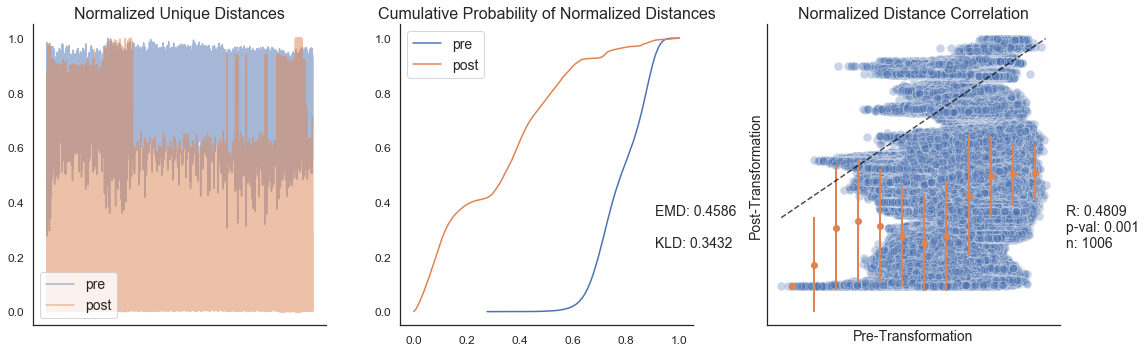

Knn Preservation: 96.0264

CPU times: user 28.9 s, sys: 4.04 s, total: 33 s
Wall time: 32.4 s


In [41]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform='arcsinh'), 
                                  post=retina1_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), 
                                                       post=retina1_SIMLR_results.knn_graph(k))))

---
# GLM-PCA

In [42]:
latent = pd.read_csv('GLM-PCA_out/qi_GLM-PCA.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [45]:
qi_GLMPCA_results = DR(matrix=latent)
qi_GLMPCA_results.results = latent
qi_GLMPCA_results.clu = Cluster(latent.astype('double'), autoplot=False)
qi_GLMPCA_results.name = 'GLM-PCA'

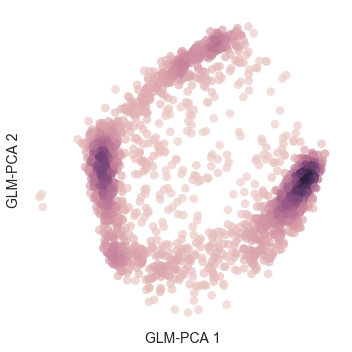

In [46]:
qi_GLMPCA_results.plot()

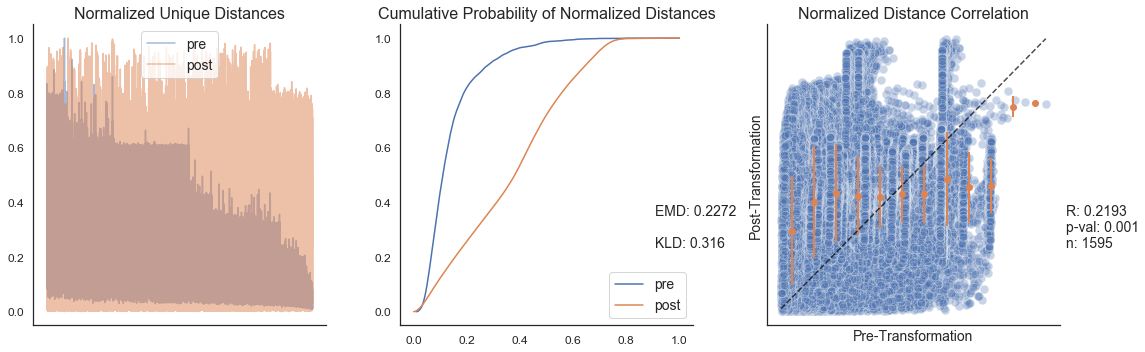

Knn Preservation: 96.8018

CPU times: user 1min 25s, sys: 12.4 s, total: 1min 37s
Wall time: 1min 37s


In [47]:
%%time

k=30
# look at GLM-PCA vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=qi.distance_matrix(transform=None), 
                                  post=qi_GLMPCA_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=qi.knn_graph(k, transform=None), 
                                                       post=qi_GLMPCA_results.knn_graph(k))))

---
### Discrete Retina Dataset
Perform same analysis on retina dataset

In [48]:
latent = pd.read_csv('GLM-PCA_out/retina1_GLM-PCA.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [49]:
retina1_GLMPCA_results = DR(matrix=latent)
retina1_GLMPCA_results.results = latent
retina1_GLMPCA_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina1_GLMPCA_results.name = 'GLM-PCA'

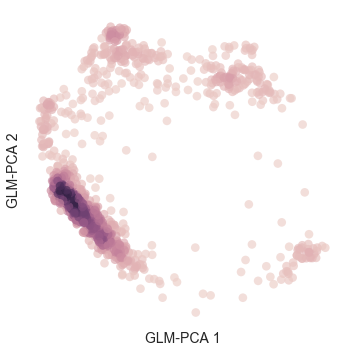

In [50]:
retina1_GLMPCA_results.plot()

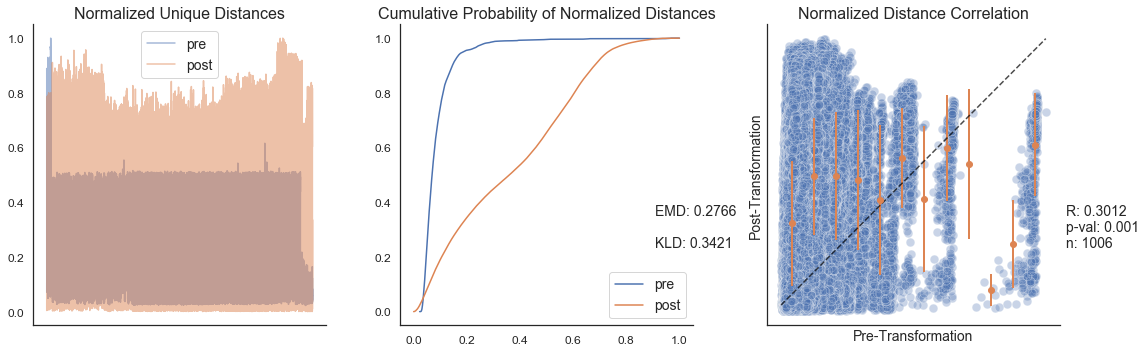

Knn Preservation: 94.8798

CPU times: user 29.1 s, sys: 3.78 s, total: 32.9 s
Wall time: 33.3 s


In [51]:
%%time

k=30
# look at GLM-PCA vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=P14Retina_0.distance_matrix(transform=None), 
                                  post=retina1_GLMPCA_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=P14Retina_0.knn_graph(k, transform=None), 
                                                       post=retina1_GLMPCA_results.knn_graph(k))))